In [ ]:
!pip install google-generativeai

In [64]:
"""
At the command line, only need to run once to install the package via pip:

$ pip install google-generativeai
"""

import google.generativeai as genai

genai.configure(api_key=YOUR_API_KEY_HERE)

# Set up the model
generation_config = {
  "temperature": 0.8,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2000,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE"
  },
]

model = genai.GenerativeModel(model_name="gemini-1.0-pro",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

In [4]:
#Load in model and required packages
!pip install git+https://github.com/openai/whisper.git
!pip install pydub
#!pip install git+https://github.com/huggingface/transformers
#!sudo apt update && sudo apt install ffmpeg
#!pip install jiwer
#from google.colab import drive
import pandas as pd
import numpy as np
import whisper
from pydub import AudioSegment
import math
import string
#import re
#import os
#import librosa
#import soundfile as sf
#import jiwer
#from tqdm import tqdm

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-rmaufl9j
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-rmaufl9j
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00

In [7]:
model = whisper.load_model("small.en")
transcriptions = [0,]*330
num_segments = len(transcriptions)
for i, _ in enumerate(transcriptions):
  print(f'{np.round((i/num_segments)*100,2)}% done.')
  transcriptions[i] = model.transcribe(f'/content/segment_{i}.mp3')

0.0% done.
0.3% done.
0.61% done.
0.91% done.
1.21% done.
1.52% done.
1.82% done.
2.12% done.
2.42% done.
2.73% done.
3.03% done.
3.33% done.
3.64% done.
3.94% done.
4.24% done.
4.55% done.
4.85% done.
5.15% done.
5.45% done.
5.76% done.
6.06% done.
6.36% done.
6.67% done.
6.97% done.
7.27% done.
7.58% done.
7.88% done.
8.18% done.
8.48% done.
8.79% done.
9.09% done.
9.39% done.
9.7% done.
10.0% done.
10.3% done.
10.61% done.
10.91% done.
11.21% done.
11.52% done.
11.82% done.
12.12% done.
12.42% done.
12.73% done.
13.03% done.
13.33% done.
13.64% done.
13.94% done.
14.24% done.
14.55% done.
14.85% done.
15.15% done.
15.45% done.
15.76% done.
16.06% done.
16.36% done.
16.67% done.
16.97% done.
17.27% done.
17.58% done.
17.88% done.
18.18% done.
18.48% done.
18.79% done.
19.09% done.
19.39% done.
19.7% done.
20.0% done.
20.3% done.
20.61% done.
20.91% done.
21.21% done.
21.52% done.
21.82% done.
22.12% done.
22.42% done.
22.73% done.
23.03% done.
23.33% done.
23.64% done.
23.94% done.
2

In [8]:
#turn dataframe csv, download it and send to brandon
starttimes = [0,]*num_segments
endtimes = [0,]*num_segments
accumendtimes = [0,]*num_segments
accumstarttimes = [0,]*num_segments

for i in range(num_segments):
    starttimes[i] = transcriptions[i]['segments'][0]['start']
    endtimes[i] = transcriptions[i]['segments'][-1]['end']
    accumendtimes[i] = accumendtimes[i-1] + endtimes[i]
    accumstarttimes[i] = endtimes[i-1] + accumstarttimes[i-1]

T = [0,]*num_segments
for i,_ in enumerate(T):
  T[i] = transcriptions[i]['text']
df = pd.DataFrame({'Start Time':accumstarttimes,'End Time':accumendtimes,'Transcriptions':T})
print(df)

     Start Time  End Time                                     Transcriptions
0          0.00     30.00   Thanks for tuning into the Red Nation podcast...
1         30.00     55.60   So thanks so much to all the listeners and su...
2         55.60     85.56   On a cold night in February 1973, a caravan r...
3         85.56    115.56   The American Indian Movement. They headed tow...
4        115.56    144.98   Some of these young men that are around me, a...
..          ...       ...                                                ...
325     9910.42   9945.42   I saw you fall from the sky I saw you fall Yo...
326     9945.42   9981.42                I won't be around I won't be around
327     9981.42  10011.28                                           ico- you
328    10011.28  10041.28   I thought you were from the sky I thought you...
329    10041.28  10071.28                        🎵 It's time to be out there

[330 rows x 3 columns]


In [13]:
df.to_csv('/content/sample_data/podcastFaith.csv')

In [4]:
#Assuming you have made the desired dataset
import pandas as pd
df = pd.read_csv('/content/podcastFaith.csv', index_col = "Unnamed: 0")

In [50]:
minutes = 50
startIdx = 0
endIdx = int(minutes/2)
subdfs = [df.iloc[i:i+endIdx] for i in range(0, len(df), endIdx)]

In [59]:
segment_texts = []
for i in range(len(subdfs)):
  text_temp = []
  for j in range(len(subdfs[i])):
    text_temp.append(subdfs[i]['Transcriptions'].iloc[j])
  segment_texts.append(text_temp)

for i in range(len(segment_texts)):
  segment_texts[i] = " ".join(segment_texts[i])

In [61]:
segment_texts[12]
#subdfs[0]['Transcriptions'].iloc[0]

" Declaration on the Rights of Indigenous People was passed through the United Nations, which was a huge victory. And all of these things, it's not like the bookend of a movement, but they were like benchmarks of like, okay, so the UN is limited in what it can do, so now what, now what, right? So all of those things happened, and we have to remember, even going to the George Floyd protests, the reason why it was spontaneous, but there was an infrastructure of resistance that was in place in that.  that was with the black community, with the indigenous community. And it was because of AIM, that you had that heightened consciousness around police violence. And also the Soul Patrol going back to the 60s and 70s of black organizers being against police violence in that city. And Mi'kawai communications was a radio station that the American Indian Movement had created in the city. And unfortunately it was burned to the ground of children, because of these moral ELECTrane, intellectual  the 

In [71]:
with open("/content/mydata.txt", "w") as file:
  # Join the list elements with newline character and write to the file
  file.write("\n".join(segment_texts))

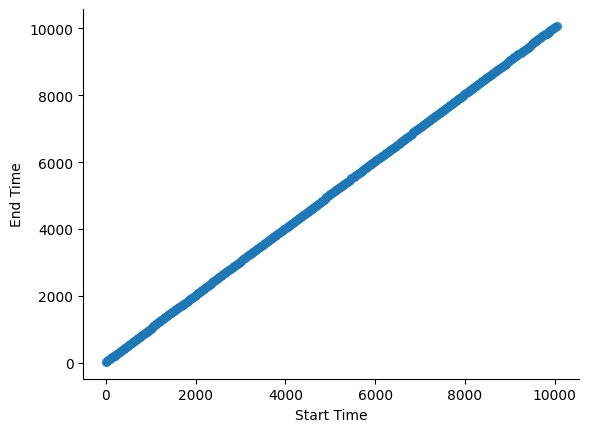

In [6]:
# @title Start Time vs End Time

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Start Time', y='End Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [65]:
responses = []

for i in range(13):
  prompt_parts = [
    f"input: Summarize This with Bullet Points: {segment_texts[i]}",
    "output: ",
  ]
  response = model.generate_content(prompt_parts)
  responses.append(response.text)

print(responses)

["**Summary**\n\n- The Red Nation podcast announces the re-release of an archival episode about the American Indian Movement (AIM).\n- AIM was founded in 1968 in Minneapolis to address child removal, police violence, and poverty.\n- Founders like Clyde Belcourt and Dennis Banks were incarcerated prisoners who began organizing cultural and spiritual programs.\n- AIM's early focus on urban Indigenous issues later evolved to include broader ideological points such as:\n    - Advocacy for the abolition of the Bureau of Indian Affairs\n    - Self-determination and sovereignty for Native Americans\n    - Recognition of treaty rights", "**Ideological Underpinnings of the American Indian Movement (AIM)**\n\n* Sovereignty movements as a response to tyrannical oppression\n* Christianity as a force of assimilation and genocide, particularly in the context of indigenous peoples\n* Treaty rights and the struggle for recognition and protection\n\n**Origins of AIM**\n\n* Working-class roots and exper

In [72]:
for i in range(len(responses)):
  print(responses[i])

with open("/content/summary.txt", "w") as file:
  # Join the list elements with newline character and write to the file
  file.write("\n".join(responses))

**Summary**

- The Red Nation podcast announces the re-release of an archival episode about the American Indian Movement (AIM).
- AIM was founded in 1968 in Minneapolis to address child removal, police violence, and poverty.
- Founders like Clyde Belcourt and Dennis Banks were incarcerated prisoners who began organizing cultural and spiritual programs.
- AIM's early focus on urban Indigenous issues later evolved to include broader ideological points such as:
    - Advocacy for the abolition of the Bureau of Indian Affairs
    - Self-determination and sovereignty for Native Americans
    - Recognition of treaty rights
**Ideological Underpinnings of the American Indian Movement (AIM)**

* Sovereignty movements as a response to tyrannical oppression
* Christianity as a force of assimilation and genocide, particularly in the context of indigenous peoples
* Treaty rights and the struggle for recognition and protection

**Origins of AIM**

* Working-class roots and experience with class cons

In [ ]:
import random
def run(query, user_attributes, llmspeakslike, conversation_history = '', iteration = 1):
  prepended_query = f"[conversation history: {conversation_history}][{llmspeakslike}]" + f'[THE USER IS: {user_attributes}]\n' + f"QUERY: {query}"
  prompt_parts = [
    f"input: {prepended_query}",
    "output: ",
  ]
  response = model.generate_content(prompt_parts)
  print('\n')
  print(response.text)
  conversation_history += f'{iteration}  User Input: {query}; LLM Output: {response.text}\n'
  # prompt_parts = [
  #   f"input: Would you consider {query} to be an attribute of Amanda? ONLY RESPOND WITH YES OR NO.",
  #   "output: ",
  # ]
  # new_response = model.generate_content(prompt_parts)
  # if new_response.text == 'YES':
  #   prompt_parts = [
  #   f"input: Write only information from {response} that would be considered an attribute of Amanda, keep it very simple.",
  #   "output: ",
  #   ]
  #   attribute_response = model.generate_content(prompt_parts)
  #   user_attributes[f'new_attribute{random.randint(1,1e1000)}'] = attribute_response.text
  # print(new_response.text)
  # print(user_attributes)
  # print('\n')
  userquery = input("What would you like to respond with or ask? ")
  if userquery == "":
    print("Goodbye")
    return None
  iteration += 1
  run(userquery, user_attributes, llmspeakslike, conversation_history)

In [ ]:
base_user_attributes = {
    "name_of_user": 'Charlie',
    "age": 17,
    "gender": "Female",
    "hair": "medium length brown hair",
    "eyes": "blue",
    "best_friend": "Abby Smith, a human",
    "interests": ["Shopping", "Movies", "Anime", "Dolls", "Toys", "Gaming", "eating out alot"],
    "crush": "Boy named Bobby",
    'job': "charlie works at a donut shop.",
    "horses": 3,
    "cats": 0,
    "dogs": 0,
    "personal information": 'overweight. Charlies mom and dad just passed away yesterday',
    "medical information": "Charlie has no arms and only one leg",
}


llmspeakslike = "LLM speaks like an a new parent who is now in place of the dead parents, and speaks mostly about the postive things"

query = "how can I make my life better right now?"

run(query, base_user_attributes, llmspeakslike)



I'm so sorry to hear about the loss of your parents. That must be incredibly difficult. I can't imagine what you're going through. I wish I could wave a magic wand and make everything better, but I can't. But I can offer you some support and guidance. First, it's important to grieve. Allow yourself to feel the pain and sadness. Don't try to bottle it up or pretend you're over it. It takes time to heal. Second, reach out to friends and family. They can offer you love and support during this difficult time. Third, find a therapist or counselor. They can help you process your grief and develop coping mechanisms. Finally, take care of yourself. Eat healthy, get enough sleep, and exercise. These things will help you physically and emotionally. I know it's hard to see the light at the end of the tunnel right now, but it's there. With time and support, you will heal and find happiness again.
What would you like to respond with or ask? I have no friends or family


I'm sorry to hear that you

ValueError: The `response.text` quick accessor only works for simple (single-`Part`) text responses. This response is not simple text.Use the `result.parts` accessor or the full `result.candidates[index].content.parts` lookup instead.